#**Tutorial**

#Librerías

In [ ]:
!pip install --upgrade kneed
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import numpy as np

#Creación de datos con sus etiquetas

In [ ]:
features, true_labels = make_blobs(
   n_samples=200,
   centers=3,
   cluster_std=2.75,
   random_state=42
   )

# Feature scaling by standarization

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Agrupar los datos

In [ ]:
kmeans = KMeans(
     init="random",
     n_clusters=3,
     n_init=10,
     max_iter=300,
     random_state=42
 )

labels = kmeans.fit_predict(scaled_features)

# Escoger el número de clusters

**Método del codo**

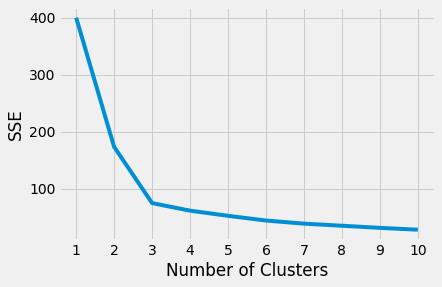

3

In [ ]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}
   
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
        kmeans.fit(scaled_features)
        sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

kl = KneeLocator(
     range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow

In [ ]:
kl = KneeLocator(
     range(1, 11), sse, curve="convex", direction="decreasing"
 )

kl.elbow

3

**Silhouette coefficient**

In [ ]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

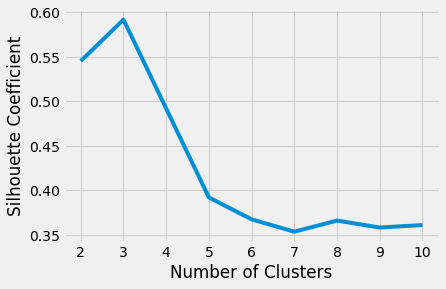

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

# Visualización

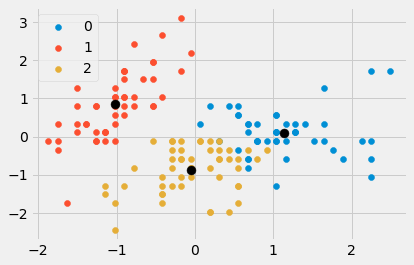

In [ ]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(labels)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(scaled_features[labels == i , 0] , scaled_features[labels == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

# Evaluación del rendimiento de la agrupación en clústeres

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_rand_score

# Instantiate k-means and dbscan algorithms
kmeans = KMeans(n_clusters=3)
dbscan = DBSCAN(eps=0.3)

# Fit the algorithms to the features
kmeans.fit(scaled_features)
dbscan.fit(scaled_features)

# Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(
    scaled_features, kmeans.labels_
).round(2)
dbscan_silhouette = silhouette_score(
    scaled_features, dbscan.labels_
).round (2)

print(kmeans_silhouette)
print(dbscan_silhouette)

0.46
-0.19


#**Category of plants in iris dataset**

#Librerías

In [ ]:
!pip install --upgrade kneed
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

#Importación de datos

In [ ]:
irisdata = pd.read_csv('Iris.csv', index_col = 'Id')

print(irisdata.shape)
irisdata.head()

(150, 5)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


#Preprocesamiento de los datos

Dividir los datos en atributos y etiquetas

In [ ]:
X = irisdata.drop('Species', axis = 1)
#X=X.to_numpy()
names = irisdata['Species']
names=names.to_list()

# Feature scaling by standarization

In [ ]:
scalerIris = StandardScaler()
scaled_featuresIris = scalerIris.fit_transform(X)

# Escoger el número de clusters

**Método del codo**

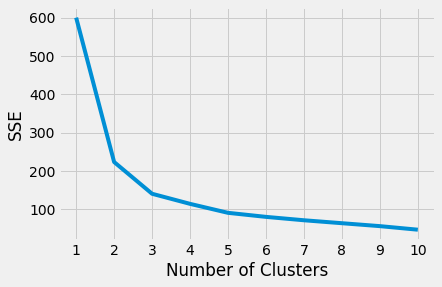

3

In [ ]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}
   
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
        kmeans.fit(scaled_featuresIris)
        sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

kl = KneeLocator(
     range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow

In [ ]:
kl = KneeLocator(
     range(1, 11), sse, curve="convex", direction="decreasing"
 )

kl.elbow

3

**Silhouette coefficient**

In [ ]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_featuresIris)
    score = silhouette_score(scaled_featuresIris, kmeans.labels_)
    silhouette_coefficients.append(score)

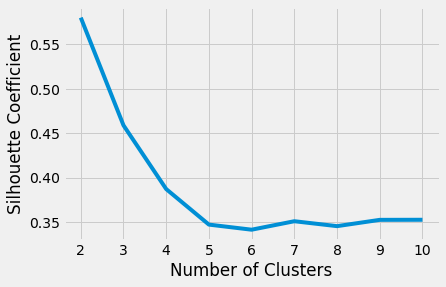

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

# Agrupar los datos

In [ ]:
kmeans = KMeans(
     init="random",
     n_clusters=3,
     n_init=10,
     max_iter=300,
     random_state=42
 )

kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, random_state=42)

# Evaluación del rendimiento de la agrupación en clústeres

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_rand_score

# Instantiate k-means and dbscan algorithms
kmeansIris = KMeans(n_clusters=3)
dbscanIris = DBSCAN(eps=0.3)

# Fit the algorithms to the features
kmeansIris.fit(scaled_featuresIris)
dbscanIris.fit(scaled_featuresIris)

# Compute the silhouette scores for each algorithm
kmeans_silhouetteIris = silhouette_score(
    scaled_featuresIris, kmeansIris.labels_
).round(2)
dbscan_silhouetteIris = silhouette_score(
    scaled_featuresIris, dbscanIris.labels_
).round (2)

print(kmeans_silhouetteIris)
print(dbscan_silhouetteIris)

0.46
-0.19
